In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [109]:
links_df= pd.read_csv("./links.csv")
movies_df = pd.read_csv("./movies.csv")
ratings_df = pd.read_csv('./ratings.csv')
#tags_df = pd.read_csv('./tags.csv')

In [110]:
links_df

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [111]:
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [112]:
ratings_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [113]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [114]:
# No of users
counts = ratings_df.userId.unique()
len(counts)

610

In [115]:
movies_df["genres_list"] = movies_df["genres"].apply(lambda x: x.split("|"))
movies_df.head()

,movieId,title,genres,genres_list
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]


In [116]:
def get_year_from_title(data):
    try:
        data = data[::-1].split("(")[0].replace(")","")[::-1]
        return data
    except Exception as e:
        print("Exception =", e , "Title = ", data)

def timestamp_convert(timestamp):
    date_time = datetime.fromtimestamp(timestamp)
    str_date = date_time.strftime("%d %B, %Y")
    return str_date

In [117]:
movies_df["Released_in"] = movies_df["title"].apply(get_year_from_title)
movies_df.head()

,movieId,title,genres,genres_list,Released_in
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],1995


In [118]:
ratings_df["Time"] = ratings_df["timestamp"].apply(timestamp_convert)
ratings_df

,userId,movieId,rating,timestamp,Time
0,1,1,4.0,964982703,"30 July, 2000"
1,1,3,4.0,964981247,"30 July, 2000"
2,1,6,4.0,964982224,"30 July, 2000"
3,1,47,5.0,964983815,"30 July, 2000"
4,1,50,5.0,964982931,"30 July, 2000"
...,...,...,...,...,...
100831,610,166534,4.0,1493848402,"03 May, 2017"
100832,610,168248,5.0,1493850091,"03 May, 2017"
100833,610,168250,5.0,1494273047,"08 May, 2017"
100834,610,168252,5.0,1493846352,"03 May, 2017"


In [119]:
movies_df.isna().sum()

movieId        0
title          0
genres         0
genres_list    0
Released_in    0
dtype: int64

In [120]:
# Genre Extraction

genres = sorted(list(set().union(*(movies_df["genres_list"].values))))
print(len(genres))
genres

20


['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [121]:
ratings_df.groupby("userId")["rating"].mean()

userId
1      4.366379
2      3.948276
3      2.435897
4      3.555556
5      3.636364
         ...   
606    3.657399
607    3.786096
608    3.134176
609    3.270270
610    3.688556
Name: rating, Length: 610, dtype: float64

In [122]:
#ratings_df = ratings_df.set_index("userId")

ratings_df['StandardizedRating'] = ratings_df["rating"] - ratings_df.groupby(["userId"])["rating"].transform("mean")
ratings_df

,userId,movieId,rating,timestamp,Time,StandardizedRating
0,1,1,4.0,964982703,"30 July, 2000",-0.366379
1,1,3,4.0,964981247,"30 July, 2000",-0.366379
2,1,6,4.0,964982224,"30 July, 2000",-0.366379
3,1,47,5.0,964983815,"30 July, 2000",0.633621
4,1,50,5.0,964982931,"30 July, 2000",0.633621
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,"03 May, 2017",0.311444
100832,610,168248,5.0,1493850091,"03 May, 2017",1.311444
100833,610,168250,5.0,1494273047,"08 May, 2017",1.311444
100834,610,168252,5.0,1493846352,"03 May, 2017",1.311444


In [123]:
freq = ratings_df["userId"].value_counts()
freq = freq.reset_index(name = "Frequency")
freq.rename(columns={"index":"userId"},inplace = True)
freq

,userId,Frequency
0,414,2698
1,599,2478
2,474,2108
3,448,1864
4,274,1346
...,...,...
605,442,20
606,569,20
607,320,20
608,576,20


In [124]:
def movie_profile_calculator(data, reference):
    vec = [0]*len(reference)
    for i in range(len(data)):
        if data[i] in reference:
            idx = reference.index(data[i])
            vec[idx]=1
    return np.array(vec)

In [125]:
movies_df["Movie Profile Vector"] = movies_df["genres_list"].apply(movie_profile_calculator, reference = genres[1:])
movies_df.head()

,movieId,title,genres,genres_list,Released_in,Movie Profile Vector
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,"[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",1995,"[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",1995,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]",1995,"[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, ..."
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],1995,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [126]:
movies_df.loc[movies_df["movieId"] == 1 , "Movie Profile Vector"].iloc[0]

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [127]:
ratings_df = ratings_df.merge(movies_df[["Movie Profile Vector","movieId"]], on = 'movieId',how = 'left')
ratings_df

,userId,movieId,rating,timestamp,Time,StandardizedRating,Movie Profile Vector
0,1,1,4.0,964982703,"30 July, 2000",-0.366379,"[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
1,1,3,4.0,964981247,"30 July, 2000",-0.366379,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
2,1,6,4.0,964982224,"30 July, 2000",-0.366379,"[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1,47,5.0,964983815,"30 July, 2000",0.633621,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
4,1,50,5.0,964982931,"30 July, 2000",0.633621,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
...,...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,"03 May, 2017",0.311444,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, ..."
100832,610,168248,5.0,1493850091,"03 May, 2017",1.311444,"[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
100833,610,168250,5.0,1494273047,"08 May, 2017",1.311444,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
100834,610,168252,5.0,1493846352,"03 May, 2017",1.311444,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [204]:
def user_profile_calculator(user, reference):
    data = reference[reference["userId"]==user]
    #vec = np.divide(((data["Movie Profile Vector"]*data["Norm_rating"]).sum()),(data["Movie Profile Vector"].sum()))
    #vec = np.divide(((data["Movie Profile Vector"]*data["Norm_rating"]).sum()),(data["Movie Profile Vector"].sum()))
    vec = np.divide(((data["Movie Profile Vector"]*data["rating"]).sum()),(data["Movie Profile Vector"].count()))
    #vec = (data["Movie Profile Vector"]*data["rating"]).sum()
    #print("User ",str(user),"\n" ,(data["Movie Profile Vector"]*data["StandardizedRating"]).sum())
    #print("User ",str(user),"\n" ,data["Movie Profile Vector"].count())
    '''
    vec[np.isnan(vec)] = 0
    vec_nonzero = vec[np.nonzero(vec)]
    if vec_nonzero.size != 0:
        vec_mean= vec_nonzero.mean()
        vec_std= vec_nonzero.std()
        vec[np.where(vec>0)] = (vec[np.where(vec>0)] - vec_mean)/vec_std
    '''
    return vec

In [205]:
user_profile_df = pd.DataFrame({"userId" : ratings_df["userId"].unique()})
user_profile_df["User Profile Vector"] = user_profile_df["userId"].apply(user_profile_calculator, reference = ratings_df)

In [206]:
user_profile_df.head()

,userId,User Profile Vector
0,1,"[1.6767241379310345, 1.6077586206896552, 0.586..."
1,2,"[1.5, 0.43103448275862066, 0.0, 0.0, 0.9655172..."
2,3,"[1.2820512820512822, 0.7692307692307693, 0.051..."
3,4,"[0.38425925925925924, 0.49074074074074076, 0.1..."
4,5,"[0.6363636363636364, 0.5909090909090909, 0.590..."


In [207]:
ratings_df[(ratings_df["userId"]==1) & (ratings_df["movieId"]==47)]

,userId,movieId,rating,timestamp,Time,StandardizedRating,Movie Profile Vector
3,1,47,5.0,964983815,"30 July, 2000",0.633621,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."


In [208]:
user_profile_df.loc[user_profile_df["userId"] == 1]["User Profile Vector"]

0    [1.6767241379310345, 1.6077586206896552, 0.586...
Name: User Profile Vector, dtype: object

In [209]:
user_profile_df.iloc[1-1][1]

array([1.67672414, 1.60775862, 0.5862069 , 0.82327586, 1.53017241,
       0.84482759, 0.        , 1.32758621, 0.87068966, 0.02155172,
       0.25431034, 0.        , 0.44396552, 0.32327586, 0.48275862,
       0.72844828, 0.98275862, 0.42672414, 0.12931034])

## 3 types of averages

### 1- simple average but fails in considering bias of one movie over other
### 2- Jaccard similarity 
### 3- weighted average

In [210]:
def cosine_similarity(profile_vec, reference):
    #reference[np.isnan(reference)] = 0
    return reference.dot(profile_vec)/(np.linalg.norm(reference)*np.linalg.norm(profile_vec))

In [211]:
def recommendation(user, user_profile_df, movies_df):
    preference = user_profile_df.iloc[user-1][1]
    data_movie_profile = pd.DataFrame(movies_df["movieId"])
    data_movie_profile["Movie Profile Vector"] = movies_df["Movie Profile Vector"]
    data_movie_profile["Sim_index"] = data_movie_profile["Movie Profile Vector"].apply(cosine_similarity, reference = preference)
    return data_movie_profile.sort_values("Sim_index",ascending=False)

In [212]:
user = recommendation(1, user_profile_df,movies_df)
user

,movieId,Movie Profile Vector,Sim_index
8597,117646,"[1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ...",0.863548
6570,55116,"[1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",0.842958
4681,6990,"[1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",0.826640
4005,5657,"[1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",0.826640
3608,4956,"[1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, ...",0.821651
...,...,...,...
9573,174403,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",NaN
9611,176601,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",NaN
9661,181413,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",NaN
9663,181719,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",NaN


In [213]:
user[user["movieId"]==47]

,movieId,Movie Profile Vector,Sim_index
43,47,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",0.244313


In [137]:
movies_df.head()

,movieId,title,genres,genres_list,Released_in,Movie Profile Vector
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,"[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",1995,"[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",1995,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]",1995,"[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, ..."
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],1995,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [138]:
viz= movies_df.drop(["genres", "Movie Profile Vector"], axis = 1)
viz.head()

,movieId,title,genres_list,Released_in
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",1995
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II (1995),[Comedy],1995


In [139]:
#viz["Average Rating"] = ratings_df.groupby(["movieId"])["rating"].mean().reset_index()

#viz["Viewership"] = ratings_df.groupby(["movieId"])["userId"].transform("size")
#viz.head()

In [932]:
g1 = ratings_df.groupby(["movieId"])["rating"].mean().reset_index()
g2 = ratings_df.groupby(["movieId"])["userId"].count().reset_index()
viz = viz.merge(g1[["movieId","rating"]], on = 'movieId',how = 'left')
viz = viz.merge(g2[["movieId","userId"]], on = 'movieId',how = 'left')
viz

,movieId,title,genres_list,Released_in,rating,userId
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,3.920930,215.0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",1995,3.431818,110.0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",1995,3.259615,52.0
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1995,2.357143,7.0
4,5,Father of the Bride Part II (1995),[Comedy],1995,3.071429,49.0
...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]",2017,4.000000,1.0
9738,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]",2017,3.500000,1.0
9739,193585,Flint (2017),[Drama],2017,3.500000,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]",2018,3.500000,1.0


In [933]:
viz = viz.rename(columns={"userId": "Viewership", "rating": "Avg Rating"})
viz

,movieId,title,genres_list,Released_in,Avg Rating,Viewership
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,3.920930,215.0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",1995,3.431818,110.0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",1995,3.259615,52.0
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1995,2.357143,7.0
4,5,Father of the Bride Part II (1995),[Comedy],1995,3.071429,49.0
...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]",2017,4.000000,1.0
9738,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]",2017,3.500000,1.0
9739,193585,Flint (2017),[Drama],2017,3.500000,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]",2018,3.500000,1.0


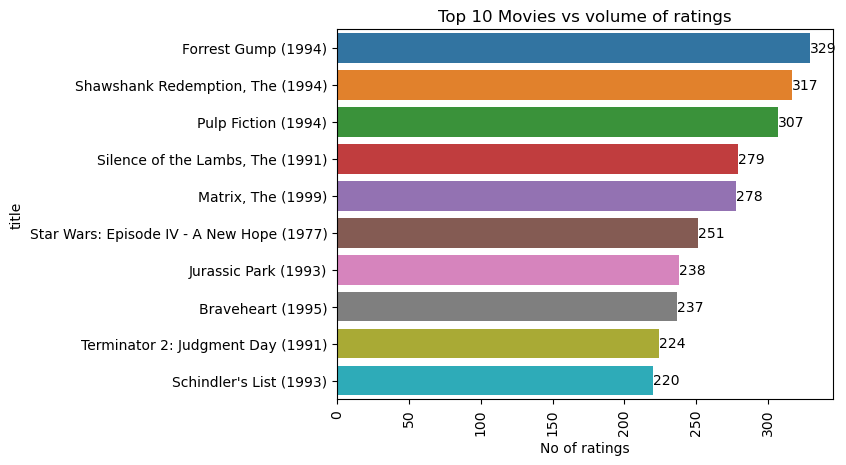

In [934]:
ax = sns.barplot(y='title',
            x="Viewership", data=viz.sort_values(by = "Viewership", ascending=False).head(10))
plt.xticks(rotation=90)
plt.xlabel("No of ratings")
plt.title("Top 10 Movies vs volume of ratings")
for i in ax.containers:
    ax.bar_label(i,)

In [935]:
df_avg = viz[viz["Viewership"] > viz["Viewership"].mean()]
df_avg

,movieId,title,genres_list,Released_in,Avg Rating,Viewership
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,3.920930,215.0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",1995,3.431818,110.0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",1995,3.259615,52.0
4,5,Father of the Bride Part II (1995),[Comedy],1995,3.071429,49.0
5,6,Heat (1995),"[Action, Crime, Thriller]",1995,3.946078,102.0
...,...,...,...,...,...,...
9571,174055,Dunkirk (2017),"[Action, Drama, Thriller, War]",2017,3.423077,13.0
9604,176371,Blade Runner 2049 (2017),[Sci-Fi],2017,3.805556,18.0
9621,177765,Coco (2017),"[Adventure, Animation, Children]",2017,3.538462,13.0
9645,179819,Star Wars: The Last Jedi (2017),"[Action, Adventure, Fantasy, Sci-Fi]",2017,3.125000,12.0


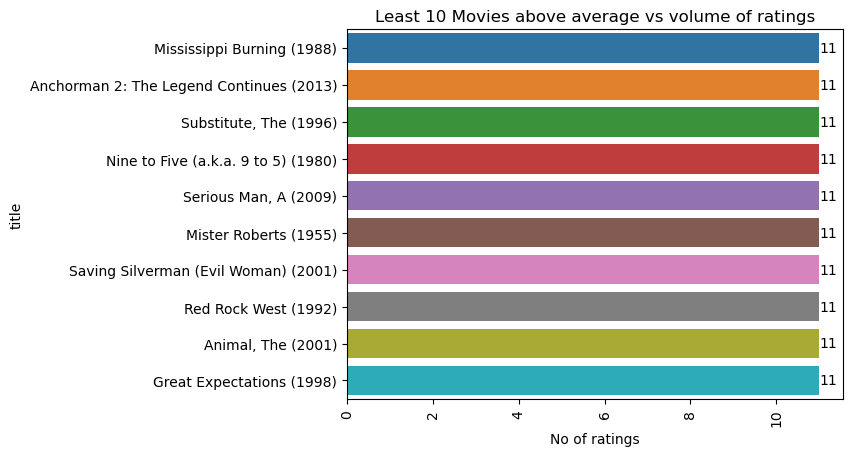

In [936]:
ax = sns.barplot(y='title',
            x="Viewership", data=df_avg.sort_values(by = "Viewership").head(10))
plt.xticks(rotation=90)
plt.xlabel("No of ratings")
plt.title("Least 10 Movies above average vs volume of ratings")
for i in ax.containers:
    ax.bar_label(i,)

In [937]:
df_avg = viz[viz["Viewership"] > viz["Viewership"].mean()]

df_avg

,movieId,title,genres_list,Released_in,Avg Rating,Viewership
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,3.920930,215.0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",1995,3.431818,110.0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",1995,3.259615,52.0
4,5,Father of the Bride Part II (1995),[Comedy],1995,3.071429,49.0
5,6,Heat (1995),"[Action, Crime, Thriller]",1995,3.946078,102.0
...,...,...,...,...,...,...
9571,174055,Dunkirk (2017),"[Action, Drama, Thriller, War]",2017,3.423077,13.0
9604,176371,Blade Runner 2049 (2017),[Sci-Fi],2017,3.805556,18.0
9621,177765,Coco (2017),"[Adventure, Animation, Children]",2017,3.538462,13.0
9645,179819,Star Wars: The Last Jedi (2017),"[Action, Adventure, Fantasy, Sci-Fi]",2017,3.125000,12.0


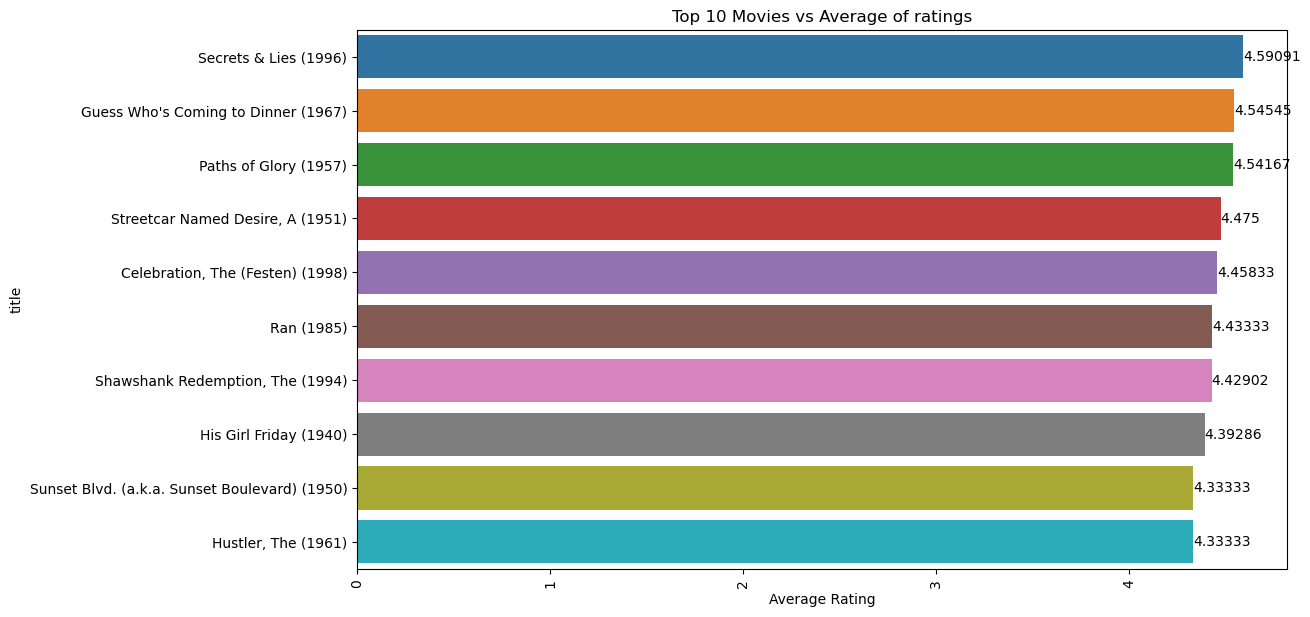

In [938]:
plt.figure(figsize=(12, 7))
ax = sns.barplot(y='title',
            x="Avg Rating", data=df_avg.sort_values(by = "Avg Rating", ascending=False).head(10))
plt.xticks(rotation=90)

plt.xlabel("Average Rating")
plt.title("Top 10 Movies vs Average of ratings")
for i in ax.containers:
    ax.bar_label(i,)

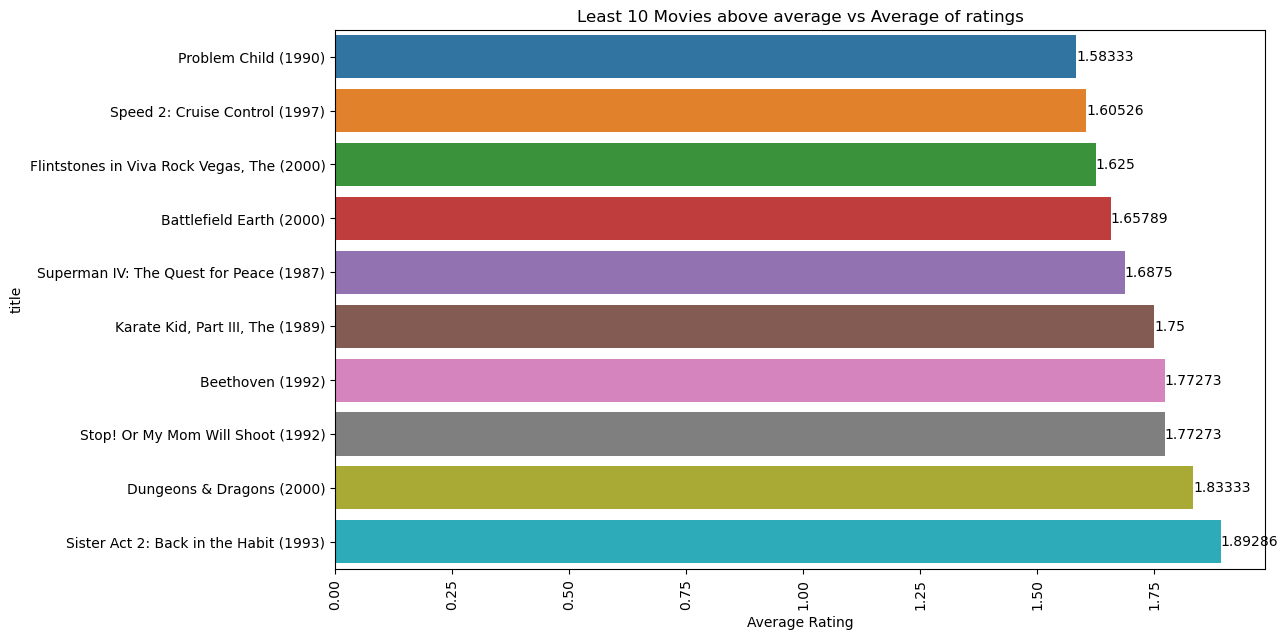

In [939]:
plt.figure(figsize=(12, 7))
ax = sns.barplot(y='title',
            x="Avg Rating", data=df_avg.sort_values(by = "Avg Rating").head(10))
plt.xticks(rotation=90)

plt.xlabel("Average Rating")
plt.title("Least 10 Movies above average vs Average of ratings")
for i in ax.containers:
    ax.bar_label(i,)

In [940]:
movies_df["Movie Profile Vector"].sum()

array([  34, 1828, 1263,  611,  664, 3756, 1199,  440, 4361,  779,   87,
        978,  158,  334,  573, 1596,  980, 1894,  382,  167])

In [941]:
genres_df = pd.DataFrame({"Genre": genres})
genres_df["Count"] = movies_df["Movie Profile Vector"].sum()
genres_df

,Genre,Count
0,(no genres listed),34
1,Action,1828
2,Adventure,1263
3,Animation,611
4,Children,664
5,Comedy,3756
6,Crime,1199
7,Documentary,440
8,Drama,4361
9,Fantasy,779


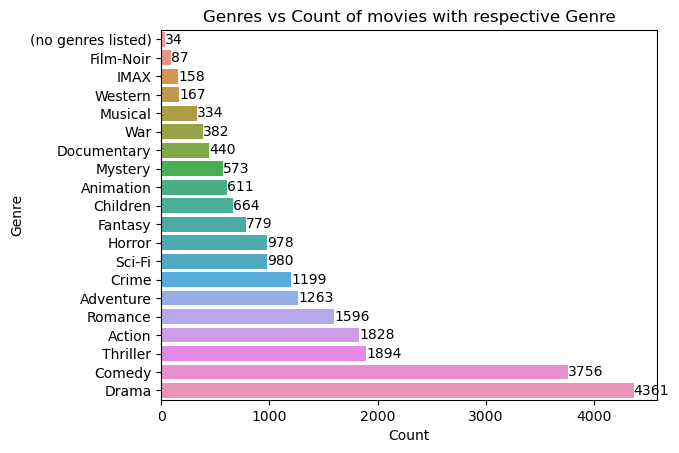

In [942]:
ax = sns.barplot(y='Genre',
            x="Count", data=genres_df,
            order=genres_df.sort_values('Count').Genre)
plt.title("Genres vs Count of movies with respective Genre")
for i in ax.containers:
    ax.bar_label(i,)

In [943]:
ratings_df.head()

,userId,movieId,rating,timestamp,Time,StandardizedRating,Movie Profile Vector
0,1,1,4.0,964982703,"30 July, 2000",-0.366379,"[0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
1,1,3,4.0,964981247,"30 July, 2000",-0.366379,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,1,6,4.0,964982224,"30 July, 2000",-0.366379,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1,47,5.0,964983815,"30 July, 2000",0.633621,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
4,1,50,5.0,964982931,"30 July, 2000",0.633621,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, ..."


In [944]:
movies_df["Released_in"].unique()

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '1968', '1988',
       '1997', '1972', '1943', '1952', '1951', '1957', '1961', '1958',
       '1954', '1934', '1944', '1960', '1963', '1942', '1941', '1953',
       '1939', '1950', '1946', '1945', '1938', '1947', '1935', '1936',
       '1956', '1949', '1932', '1975', '1974', '1971', '1979', '1987',
       '1986', '1980', '1978', '1985', '1966', '1962', '1983', '1984',
       '1948', '1933', '1931', '1922', '1998', '1929', '1930', '1927',
       '1928', '1999', '2000', '1926', '1919', '1921', '1925', '1923',
       '2001', '2002', '2003', '1920', '1915', '1924', '2004', '1916',
       '1917', '1999 ', '2005', '2006', '1902', 'Babylon 5', '1903',
       '2007', '2008', '2008 ', '2007 ', '2009', '2010', '2011', '2012',
       '2011 ', '1998 ', '1995 ', '2013', '2012 ', '1973 ', '2014',
       '2

### Collaborative Filtering

In [238]:
rating_matrix_df = ratings_df[["userId","movieId","rating"]].pivot(index = "userId", columns = "movieId", values = "rating").fillna(0)
rating_matrix_df

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [239]:
rating_matrix_df = rating_matrix_df.astype('int64')

In [240]:
def encode_ratings(x):
    if x>=1:
        return 1
    else:
        return 0

df_apriori = rating_matrix_df.applymap(encode_ratings)
df_apriori

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
607,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
608,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [241]:
from mlxtend.frequent_patterns import apriori

frequent_itemset = apriori(df_apriori, min_support=0.07, use_colnames=True)
frequent_itemset.head()

C:\Users\saire\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


MemoryError: Unable to allocate 359. GiB for an array with shape (19742032, 4, 610) and data type int64